In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_rows = 4000

In [2]:
df = pd.read_csv (r'C:\Users\Sharon & Floyd\Downloads\AI files\Capstone\amazon project\train_data.csv')
df.head(5)

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [3]:
df=df[['reviews.text','sentiment']]
df.head()

,reviews.text,sentiment
0,Purchased on Black FridayPros - Great Price (e...,Positive
1,I purchased two Amazon in Echo Plus and two do...,Positive
2,Just an average Alexa option. Does show a few ...,Neutral
3,"very good product. Exactly what I wanted, and ...",Positive
4,This is the 3rd one I've purchased. I've bough...,Positive


In [4]:
df['reviews.text'][0]

'Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money'

In [5]:
df.shape

(4000, 2)

In [6]:
df.isnull().sum()

reviews.text    0
sentiment       0
dtype: int64

In [7]:
df.isna().sum()

reviews.text    0
sentiment       0
dtype: int64

In [8]:
df.columns

Index(['reviews.text', 'sentiment'], dtype='object')

# Project Task: Week 1



## 1. Perform an EDA on the dataset.

## a)  See what a positive, negative, and neutral review looks like

In [9]:
print (df.groupby('sentiment'))
df2 = pd.DataFrame(df.groupby(['sentiment','reviews.text']).sum())

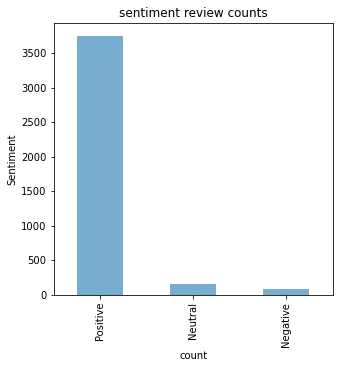

In [10]:
import matplotlib.pyplot as plt
plt.title ("sentiment review counts")
plt.xlabel ('count')
plt.ylabel ('Sentiment')
df['sentiment'].value_counts().plot(kind='bar',alpha=0.6, figsize=(5,5))
plt.show()

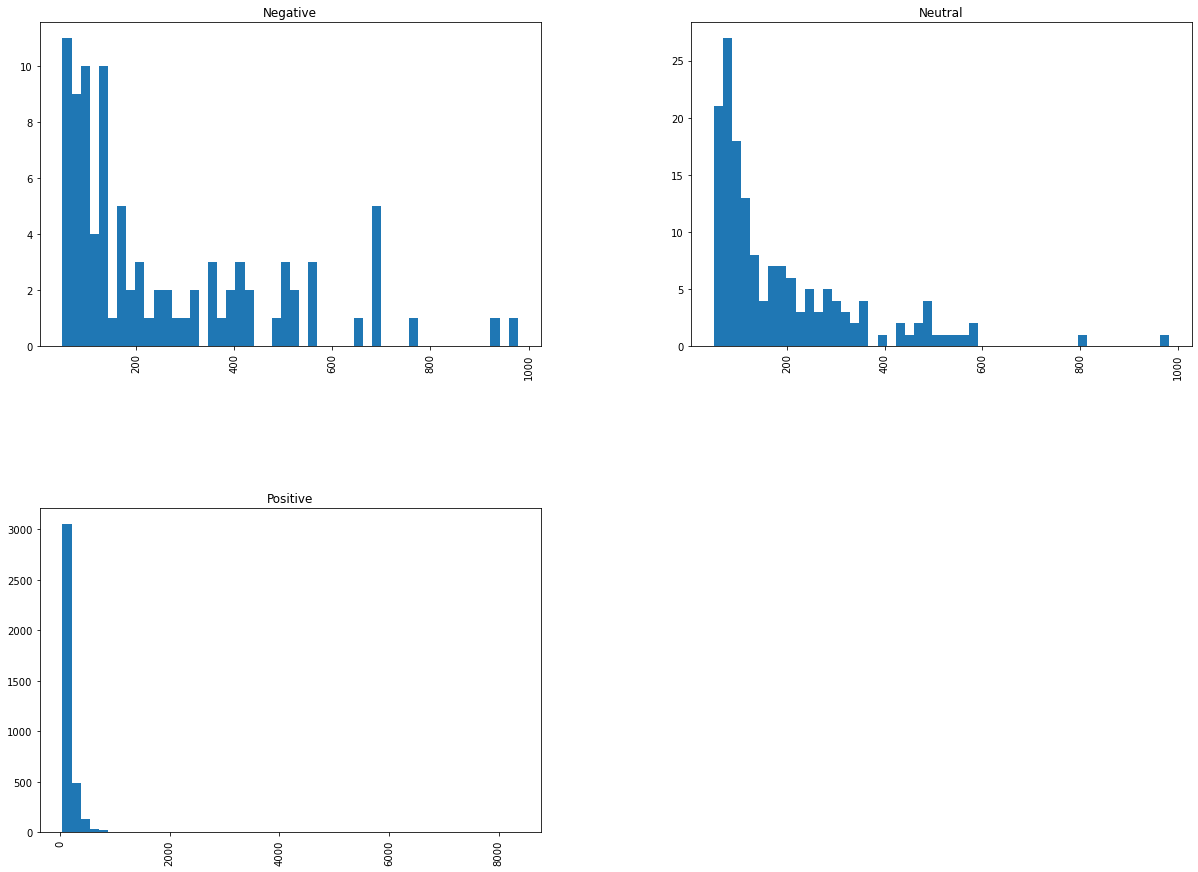

In [11]:
df.loc[:,'length'] = df.loc[:,'reviews.text'].apply(len)
df.hist(column='length',by='sentiment', bins =50, figsize=(20,15))
plt.show()

In [12]:
positive = " ".join (df[df['sentiment']=='Positive']['reviews.text'])
negative = " ".join (df[df['sentiment']=='Negative']['reviews.text'])
neutral= " ".join (df[df['sentiment']=='Neutral']['reviews.text'])

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [14]:
wordcloud_pos = WordCloud(width=1000, height = 700, background_color='white').generate(positive)
wordcloud_neg = WordCloud(width=1000, height =700, background_color='white').generate(negative)
wordcloud_neu = WordCloud(width=1000, height = 700, background_color='white').generate(neutral)


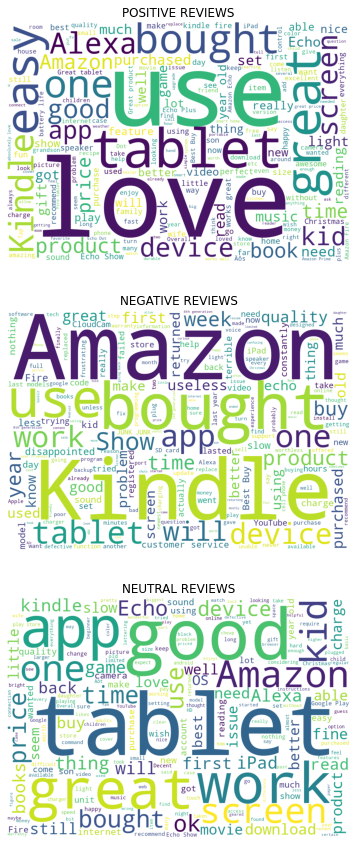

In [15]:
columns = 1
rows = 3
fig = plt.figure(figsize=(30, 15))

fig.add_subplot(rows, columns, 1)
plt.imshow(wordcloud_pos)
plt.title ('POSITIVE REVIEWS')
plt.axis('off');

fig.add_subplot(rows, columns, 2)
plt.imshow(wordcloud_neg)
plt.title ('NEGATIVE REVIEWS')
plt.axis('off');

fig.add_subplot(rows, columns, 3)
plt.imshow(wordcloud_neu)
plt.title ('NEUTRAL REVIEWS')
plt.axis('off');

##  b)  Check the class count for each class. It’s a class imbalance problem.

In [16]:
df['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

## 2. Convert the reviews in Tf-Idf score.

### we will first clean and tokenize each comment

In [17]:
text =[]
for i in df['reviews.text']:
    text.append(i)


In [18]:
text_lwr=[x.lower() for x in text]
text_lwr

['purchased on black fridaypros - great price (even off sale)very powerful and fast with quad core processors amazing soundwell builtcons -amazon ads, amazon need this to subsidize the tablet and will remove the adds if you pay them $15.inability to access other apps except the ones from amazon. there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money',
 'i purchased two amazon in echo plus and two dots plus four fire sticks and the hub philips hue for lamp for the family at christmas 2017. i‚äôm so happy with these purchases and learning so much with alexa. you can start your daily routine with alexa and program it to whatever you would like to include news weather music horoscope also you can start your day off with a compliment and i think is very important. alexa gave me the best chili recipe i mean the best it‚äôs called chili i. i want my husband to use alexa to stay organized for business dates and reminders. this is the 

In [19]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


# text_token = [word_tokenize(sent) for sent in text_lwr]


tokenizer = RegexpTokenizer(r'\w+')
text_token= [tokenizer.tokenize(sent) for sent in text_lwr]
text_token

[['purchased',
  'on',
  'black',
  'fridaypros',
  'great',
  'price',
  'even',
  'off',
  'sale',
  'very',
  'powerful',
  'and',
  'fast',
  'with',
  'quad',
  'core',
  'processors',
  'amazing',
  'soundwell',
  'builtcons',
  'amazon',
  'ads',
  'amazon',
  'need',
  'this',
  'to',
  'subsidize',
  'the',
  'tablet',
  'and',
  'will',
  'remove',
  'the',
  'adds',
  'if',
  'you',
  'pay',
  'them',
  '15',
  'inability',
  'to',
  'access',
  'other',
  'apps',
  'except',
  'the',
  'ones',
  'from',
  'amazon',
  'there',
  'is',
  'a',
  'way',
  'which',
  'i',
  'was',
  'able',
  'to',
  'accomplish',
  'to',
  'add',
  'the',
  'google',
  'play',
  'storenet',
  'this',
  'is',
  'a',
  'great',
  'tablet',
  'for',
  'the',
  'money'],
 ['i',
  'purchased',
  'two',
  'amazon',
  'in',
  'echo',
  'plus',
  'and',
  'two',
  'dots',
  'plus',
  'four',
  'fire',
  'sticks',
  'and',
  'the',
  'hub',
  'philips',
  'hue',
  'for',
  'lamp',
  'for',
  'the',
  'f

In [20]:
from nltk.corpus import stopwords

In [21]:
text_stopword = []
stop_words = set(stopwords.words('english'))
for List in range (len (text_token)):
    List1 = []
    for word in range (len (text_token[List])):
        if text_token[List][word] not in stop_words:
            List1.append (text_token[List][word])
    text_stopword.append(List1)
text_stopword

[['purchased',
  'black',
  'fridaypros',
  'great',
  'price',
  'even',
  'sale',
  'powerful',
  'fast',
  'quad',
  'core',
  'processors',
  'amazing',
  'soundwell',
  'builtcons',
  'amazon',
  'ads',
  'amazon',
  'need',
  'subsidize',
  'tablet',
  'remove',
  'adds',
  'pay',
  '15',
  'inability',
  'access',
  'apps',
  'except',
  'ones',
  'amazon',
  'way',
  'able',
  'accomplish',
  'add',
  'google',
  'play',
  'storenet',
  'great',
  'tablet',
  'money'],
 ['purchased',
  'two',
  'amazon',
  'echo',
  'plus',
  'two',
  'dots',
  'plus',
  'four',
  'fire',
  'sticks',
  'hub',
  'philips',
  'hue',
  'lamp',
  'family',
  'christmas',
  '2017',
  'äôm',
  'happy',
  'purchases',
  'learning',
  'much',
  'alexa',
  'start',
  'daily',
  'routine',
  'alexa',
  'program',
  'whatever',
  'would',
  'like',
  'include',
  'news',
  'weather',
  'music',
  'horoscope',
  'also',
  'start',
  'day',
  'compliment',
  'think',
  'important',
  'alexa',
  'gave',
  'b

In [22]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()

In [23]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
text_cleaned =[]

for List in range (len (text_stopword)):
    text_cleaned.append(" ".join([ lem.lemmatize(x) for x in text_stopword[List]]))
    
text_cleaned

['purchased black fridaypros great price even sale powerful fast quad core processor amazing soundwell builtcons amazon ad amazon need subsidize tablet remove add pay 15 inability access apps except one amazon way able accomplish add google play storenet great tablet money',
 'purchased two amazon echo plus two dot plus four fire stick hub philip hue lamp family christmas 2017 äôm happy purchase learning much alexa start daily routine alexa program whatever would like include news weather music horoscope also start day compliment think important alexa gave best chili recipe mean best äôs called chili want husband use alexa stay organized business date reminder way go',
 'average alexa option show thing screen still limited',
 'good product exactly wanted good price',
 '3rd one purchased bought one niece case compare one held protected tablet many time dropping',
 'great product light weight wish wifi download online',
 '7 year old daughter saved brother bought 8gb year earlier new need

### applying TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2,3))

In [25]:
text_vectorized = vectorizer.fit_transform(text_cleaned)
 

In [26]:
text_vectorized.shape

(4000, 78202)

In [27]:
text_vectorized

<4000x78202 sparse matrix of type '<class 'numpy.float64'>'
	with 108564 stored elements in Compressed Sparse Row format>

In [28]:
text_array = np.asarray(text_vectorized)

In [29]:
text_array

array(<4000x78202 sparse matrix of type '<class 'numpy.float64'>'
	with 108564 stored elements in Compressed Sparse Row format>,
      dtype=object)

## 3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

encode = LabelEncoder()
ohe = OneHotEncoder()

In [31]:
df.sentiment = encode.fit_transform(df.sentiment)
df.head()

,reviews.text,sentiment,length
0,Purchased on Black FridayPros - Great Price (e...,2,409
1,I purchased two Amazon in Echo Plus and two do...,2,593
2,Just an average Alexa option. Does show a few ...,1,81
3,"very good product. Exactly what I wanted, and ...",2,63
4,This is the 3rd one I've purchased. I've bough...,2,179


In [32]:
x_train,x_test, y_train, y_test  = train_test_split (text_vectorized,df.sentiment, test_size = 0.20, random_state =1)

In [33]:
x_test.shape

(800, 78202)

In [34]:
x_train.shape

(3200, 78202)

In [35]:
MN = MultinomialNB()

In [36]:
MN.fit(x_train,y_train)

MultinomialNB()

### we will predict with a negative review. Remember Positive =2, neutral =1, negative =0

In [37]:
MN.predict(x_test[368])

array([2])

In [38]:
y_test[368]

0

In [39]:
y_predict = MN.predict (x_test)
from sklearn import metrics
print (metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        39
           2       0.93      1.00      0.96       744

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.90       800



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### As Predicted, model predicted a positive, when it should have been a negative. Model performed poorly in precision and recall for the imbalance 

# --------------------------------------------------------------------------------------

# Project Task: Week 2

## Tackling Class Imbalance Problem:

## 1. Oversampling or undersampling can be used to tackle the class imbalance problem.

In [41]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [42]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)

In [43]:
x_resampled, y_resampled = smote.fit_resample(text_vectorized,df.sentiment)

In [44]:
df.sentiment.value_counts()

2    3749
1     158
0      93
Name: sentiment, dtype: int64

In [45]:
y_resampled.value_counts()

2    3749
1    3749
0    3749
Name: sentiment, dtype: int64

In [46]:
x_train_r,x_test_r, y_train_r, y_test_r = train_test_split (x_resampled, y_resampled, test_size = 0.20, random_state =1)

In [47]:
MN.fit(x_train_r,y_train_r)

MultinomialNB()

In [48]:
y_predict_r = MN.predict (x_test_r)
print (metrics.classification_report(y_test_r,y_predict_r))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       753
           1       0.95      1.00      0.98       711
           2       1.00      0.95      0.97       786

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250



### As seen, oversampling fixed the issue and improved the precision, recall and overall model accuracy

## 2. In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

In [49]:
from sklearn.metrics import classification_report, roc_auc_score

In [50]:
print('                 BEFORE FIXING IMBALANCE \n\n', classification_report(y_test, y_predict))

                 BEFORE FIXING IMBALANCE 

               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        39
           2       0.93      1.00      0.96       744

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.90       800



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
y = np.array (y_test)

In [52]:
y_predict.size

800

In [54]:
#roc_auc_score(np.array (y_test), y_predict, multi_class='ovr')

In [55]:
y_predict.shape
# roc_auc_score(y_test, y_predict, multi_class = 'ovo')

(800,)

In [56]:
print('                 AFTER FIXING IMBALANCE \n\n', classification_report(y_test_r, y_predict_r))

                 AFTER FIXING IMBALANCE 

               precision    recall  f1-score   support

           0       0.99      1.00      1.00       753
           1       0.95      1.00      0.98       711
           2       1.00      0.95      0.97       786

    accuracy                           0.98      2250
   macro avg       0.98      0.98      0.98      2250
weighted avg       0.98      0.98      0.98      2250



## 3. Use Tree-based classifiers like Random Forest and XGBoost.
       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter   
       which takes care of the imbalanced class.

In [57]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [58]:
RF=RandomForestClassifier()
XGB=XGBClassifier()

### using Random Forest

In [59]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_predict = RF.predict (x_test)

In [61]:
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45        17
           1       1.00      0.15      0.27        39
           2       0.94      1.00      0.97       744

    accuracy                           0.94       800
   macro avg       0.98      0.48      0.56       800
weighted avg       0.95      0.94      0.93       800



### optimizing Random forest classifier to add class bias

In [62]:
RF=RandomForestClassifier(n_estimators= 300, criterion= 'entropy', class_weight = 'balanced')


In [63]:
RF.fit(x_train,y_train)
y_predict = RF.predict (x_test)
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.29      0.45        17
           1       1.00      0.15      0.27        39
           2       0.94      1.00      0.97       744

    accuracy                           0.94       800
   macro avg       0.98      0.48      0.56       800
weighted avg       0.95      0.94      0.93       800



In [64]:
### above test shows that adding class bias did not change the model performance

### using XGBoost

In [65]:
XGB=XGBClassifier()
XGB.fit(x_train,y_train)
y_predict = XGB.predict (x_test)
print (classification_report(y_test, y_predict))

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.75      0.18      0.29        17
           1       0.75      0.08      0.14        39
           2       0.94      1.00      0.97       744

    accuracy                           0.94       800
   macro avg       0.81      0.42      0.46       800
weighted avg       0.92      0.94      0.91       800



### optimizing xgboost to add regularization

In [66]:
XGB=XGBClassifier(reg_alpha=0.1,reg_lambda=0.1 )
XGB.fit(x_train,y_train)
y_predict = XGB.predict (x_test)
print (classification_report(y_test, y_predict))

[23:48:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.67      0.10      0.18        39
           2       0.94      1.00      0.97       744

    accuracy                           0.94       800
   macro avg       0.87      0.43      0.48       800
weighted avg       0.93      0.94      0.91       800



### XGBoost with regularization worked better than standard algorithm. But overall random Forest showed better results.

# ----------------------------------------------


# Project Task: Week 3

### Model Selection:
### 1. Apply multi-class SVM’s and neural nets.

In [67]:
from sklearn import svm

### testing SVM with random hyperparameters

In [68]:
SVM = svm.SVC(kernel='rbf', C=30, gamma='auto')
SVM.fit(x_train,y_train)
y_predict = SVM.predict (x_test)
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        39
           2       0.93      1.00      0.96       744

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.90       800



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### tuning the hyperparameter using gridsearch cross validation

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
clf = GridSearchCV(svm.SVC(class_weight = 'balanced'),{
    'C': [1,3,5,10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale']
    
})
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [1, 3, 5, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [71]:
clf.best_estimator_

SVC(C=1, class_weight='balanced', kernel='poly')

### using tuned hyperparameters with SVM again

In [72]:
SVM = svm.SVC(kernel='poly', C=1, gamma='auto',class_weight = 'balanced')
SVM.fit(x_train,y_train)
y_predict = SVM.predict (x_test)
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.05      1.00      0.09        39
           2       0.00      0.00      0.00       744

    accuracy                           0.05       800
   macro avg       0.02      0.33      0.03       800
weighted avg       0.00      0.05      0.00       800



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### overall SVM did not work very well.

## 2. Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

### XGBoost 

In [73]:
XGB=XGBClassifier(reg_alpha=0.1,reg_lambda=0.1 )
XGB.fit(x_train,y_train)
y_predict = XGB.predict (x_test)
print (classification_report(y_test, y_predict))

C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.67      0.10      0.18        39
           2       0.94      1.00      0.97       744

    accuracy                           0.94       800
   macro avg       0.87      0.43      0.48       800
weighted avg       0.93      0.94      0.91       800



### oversampled_multinomial_NB.

In [74]:
MN = MultinomialNB()
MN.fit(x_train_r,y_train_r)
y_predict_r= XGB.predict (x_test_r)
print (classification_report(y_test_r, y_predict_r))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87       753
           1       1.00      0.51      0.67       711
           2       0.62      1.00      0.76       786

    accuracy                           0.77      2250
   macro avg       0.86      0.77      0.77      2250
weighted avg       0.86      0.77      0.77      2250



### oversampled Multinomial NB works best

## 3. Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

In [75]:
from textblob import TextBlob

In [76]:
def subject(x):
    return TextBlob(x).subjectivity
def polar(x):
    return TextBlob(x).polarity+1 ## adding 1 to remove negatives for Multinomial Naive Bayes

def senti(x):
    return TextBlob(x).sentiment
 
df['subjectivity'] = df['reviews.text'].apply(subject)
df['polarity'] =df['reviews.text'].apply(polar)
df['sentiment_score'] =df['reviews.text'].apply(senti)

In [77]:
df.head(2)

,reviews.text,sentiment,length,subjectivity,polarity,sentiment_score
0,Purchased on Black FridayPros - Great Price (e...,2,409,0.679167,1.363542,"(0.36354166666666665, 0.6791666666666667)"
1,I purchased two Amazon in Echo Plus and two do...,2,593,0.498214,1.458214,"(0.45821428571428574, 0.49821428571428567)"


In [78]:
X = df[['subjectivity', 'polarity']]
X.head()

,subjectivity,polarity
0,0.679167,1.363542
1,0.498214,1.458214
2,0.214286,0.859524
3,0.603333,1.690000
4,0.291667,1.187500


In [79]:
x_train_senti,x_test_senti, y_train_senti, y_test_senti  = train_test_split (X,df.sentiment, test_size = 0.20, random_state =1)

### SVM

In [80]:
#testing SVM with random hyperparameters
SVM = svm.SVC(kernel='rbf', C=30, gamma='auto',class_weight = 'balanced')
SVM.fit(x_train_senti,y_train_senti)
y_predict_senti = SVM.predict (x_test_senti)
print (classification_report(y_test_senti, y_predict_senti))

              precision    recall  f1-score   support

           0       0.09      0.76      0.16        17
           1       0.06      0.26      0.09        39
           2       0.98      0.64      0.77       744

    accuracy                           0.62       800
   macro avg       0.37      0.55      0.34       800
weighted avg       0.91      0.62      0.72       800



### Above results show scoring the text prior to ML proves better results.. 

### XGBoost

In [81]:
XGB=XGBClassifier(reg_alpha=0.1,reg_lambda=0.1 )
XGB.fit(x_train_senti,y_train_senti)
y_predict_senti = XGB.predict (x_test_senti)
print (classification_report(y_test_senti, y_predict_senti))

[23:54:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.75      0.15      0.26        39
           2       0.94      0.99      0.97       744

    accuracy                           0.94       800
   macro avg       0.79      0.50      0.56       800
weighted avg       0.93      0.94      0.92       800



### Multinomial Naive Bayes

In [82]:
MN = MultinomialNB()
MN.fit(x_train_senti,y_train_senti)
y_predict_senti= MN.predict (x_test_senti)
print (classification_report(y_test_senti, y_predict_senti))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        39
           2       0.93      1.00      0.96       744

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.90       800



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Considering the f1 score, overall Xgboost with text scoring performed the best

## USING NEURAL NETWORKS (CNN)

In [83]:
from nltk.tokenize import word_tokenize

word_tokens= [word_tokenize(sent) for sent in text_cleaned]


In [84]:
data = df[['sentiment']]
data['text_cleaned'] = text_cleaned
data['text_token'] = word_tokens
data.head()

<ipython-input-84-65030bb1ec2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_cleaned'] = text_cleaned
<ipython-input-84-65030bb1ec2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_token'] = word_tokens


,sentiment,text_cleaned,text_token
0,2,purchased black fridaypros great price even sa...,"[purchased, black, fridaypros, great, price, e..."
1,2,purchased two amazon echo plus two dot plus fo...,"[purchased, two, amazon, echo, plus, two, dot,..."
2,1,average alexa option show thing screen still l...,"[average, alexa, option, show, thing, screen, ..."
3,2,good product exactly wanted good price,"[good, product, exactly, wanted, good, price]"
4,2,3rd one purchased bought one niece case compar...,"[3rd, one, purchased, bought, one, niece, case..."


In [85]:
data_train, data_test = train_test_split (data, test_size = 0.20, random_state =1)

In [86]:
all_training_words = [word for tokens in data_train["text_token"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["text_token"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

48478 words total, with a vocabulary size of 3899
Max sentence length is 343


In [87]:
all_test_words = [word for tokens in data_test["text_token"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["text_token"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

12996 words total, with a vocabulary size of 2193
Max sentence length is 713


In [88]:
from gensim.models import Word2Vec, KeyedVectors
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [89]:

model_word2vec = Word2Vec (word_tokens, size=200, window=4, min_count=2)



In [90]:
model_word2vec.train(word_tokens,total_examples=len(word_tokens),epochs=10)

(490544, 614740)

In [91]:
#model_word2vec.wv['amazon']
#model_word2vec.wv.most_similar (positive='amazon')

In [92]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["text_cleaned"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["text_cleaned"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 3897 unique tokens.


In [93]:
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM = 200

In [94]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [95]:
train_cnn_data

array([[   0,    0,    0, ...,   18,   57,  294],
       [ 262,  762,   62, ...,  151,  321,  348],
       [   0,    0,    0, ...,    5,  884,    4],
       ...,
       [   0,    0,    0, ...,   41, 1253,  376],
       [   0,    0,    0, ...,   37,  469, 1071],
       [   0,    0,    0, ..., 1007,   47,  344]])

In [96]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = model_word2vec[word] if word in model_word2vec else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(3898, 200)


<ipython-input-96-064fef430ec3>:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  train_embedding_weights[index,:] = model_word2vec[word] if word in model_word2vec else np.random.rand(EMBEDDING_DIM)
<ipython-input-96-064fef430ec3>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  train_embedding_weights[index,:] = model_word2vec[word] if word in model_word2vec else np.random.rand(EMBEDDING_DIM)


In [97]:
test_sequences = tokenizer.texts_to_sequences(data_test["text_cleaned"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [98]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding

In [99]:
embedding_layer = Embedding(len(train_word_index)+1,
                            EMBEDDING_DIM,
                            weights=[train_embedding_weights],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

convs = []
filter_sizes = [2,3,4,5,6]

for filter_size in filter_sizes:
    l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
    l_pool = GlobalMaxPooling1D()(l_conv)
    convs.append(l_pool)


l_merge = concatenate(convs, axis=1)

x = Dropout(0.1)(l_merge)  
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
preds = Dense(3, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='SparseCategoricalCrossentropy',
                  optimizer='adam',
                  metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 200)      779600      input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 49, 200)      80200       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 48, 200)      120200      embedding[0][0]                  
______________________________________________________________________________________________

In [100]:
x_train = train_cnn_data
y_train = data_train['sentiment'].values


In [101]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=35)

Epoch 1/10
83/83 [==============================] - 8s 100ms/step - loss: 0.3344 - acc: 0.9271 - val_loss: 0.1925 - val_acc: 0.9594
Epoch 2/10
83/83 [==============================] - 8s 96ms/step - loss: 0.2693 - acc: 0.9368 - val_loss: 0.1892 - val_acc: 0.9594
Epoch 3/10
83/83 [==============================] - 8s 93ms/step - loss: 0.2479 - acc: 0.9368 - val_loss: 0.2154 - val_acc: 0.9594
Epoch 4/10
83/83 [==============================] - 8s 93ms/step - loss: 0.2401 - acc: 0.9368 - val_loss: 0.2083 - val_acc: 0.9594
Epoch 5/10
83/83 [==============================] - 8s 92ms/step - loss: 0.2247 - acc: 0.9365 - val_loss: 0.1863 - val_acc: 0.9594ETA:  - ETA: 0s - loss: 0.2291 - acc: 0.
Epoch 6/10
83/83 [==============================] - 8s 96ms/step - loss: 0.1969 - acc: 0.9375 - val_loss: 0.1968 - val_acc: 0.9594
Epoch 7/10
83/83 [==============================] - 8s 101ms/step - loss: 0.1869 - acc: 0.9378 - val_loss: 0.1899 - val_acc: 0.9563
Epoch 8/10
83/83 [=======================

In [102]:
predictions = model.predict(test_cnn_data)


In [103]:
y_predict = []
for p in predictions:
    y_predict.append(np.argmax(p))

In [104]:
print (classification_report(data_test.sentiment, y_predict))

              precision    recall  f1-score   support

           0       0.43      0.18      0.25        17
           1       0.24      0.21      0.22        39
           2       0.94      0.96      0.95       744

    accuracy                           0.91       800
   macro avg       0.54      0.45      0.48       800
weighted avg       0.90      0.91      0.90       800



## CNN performed just as good as XGBoost with scoring

# Project Task: Week 4

## Applying LSTM:
## 1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)
       Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

In [105]:
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import label_binarize

In [106]:
model = Sequential()
model.add (Embedding(len(train_word_index)+1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add (Dropout(0.3))
model.add(LSTM(200, return_sequences = True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# model = Model(sequence_input, preds)
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 200)           779600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 200)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50, 200)           320800    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 603       
Total params: 1,421,803
Trainable params: 1,421,803
Non-trainable params: 0
_________________________________________________________________


In [107]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=35)

Epoch 1/10
83/83 [==============================] - 49s 596ms/step - loss: 0.3076 - acc: 0.9316 - val_loss: 0.1889 - val_acc: 0.9594
Epoch 2/10
83/83 [==============================] - 48s 575ms/step - loss: 0.2091 - acc: 0.9427 - val_loss: 0.2049 - val_acc: 0.9594
Epoch 3/10
83/83 [==============================] - 47s 565ms/step - loss: 0.1361 - acc: 0.9542 - val_loss: 0.2183 - val_acc: 0.9375
Epoch 4/10
83/83 [==============================] - 47s 568ms/step - loss: 0.0890 - acc: 0.9663 - val_loss: 0.2595 - val_acc: 0.9281
Epoch 5/10
83/83 [==============================] - 47s 565ms/step - loss: 0.0591 - acc: 0.9792 - val_loss: 0.2657 - val_acc: 0.9563
Epoch 6/10
83/83 [==============================] - 47s 563ms/step - loss: 0.0382 - acc: 0.9858 - val_loss: 0.2925 - val_acc: 0.9594
Epoch 7/10
83/83 [==============================] - 47s 568ms/step - loss: 0.0211 - acc: 0.9937 - val_loss: 0.3609 - val_acc: 0.9438
Epoch 8/10
83/83 [==============================] - 47s 565ms/step - 

In [108]:
predictions = model.predict(test_cnn_data)

In [109]:
y_predict = []
for p in predictions:
    y_predict.append(np.argmax(p))

In [110]:
print (classification_report(data_test.sentiment, y_predict))

              precision    recall  f1-score   support

           0       0.50      0.29      0.37        17
           1       0.40      0.21      0.27        39
           2       0.95      0.98      0.96       744

    accuracy                           0.93       800
   macro avg       0.62      0.49      0.53       800
weighted avg       0.91      0.93      0.92       800



##   2. Compare the accuracy of neural nets with traditional ML based algorithms.

### all models had a very high accuracy due to the dataset being heavily imbalanced. overall XGBoost with regularization showed the highest accuracy of 94%

## 3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 
       Hint: Use techniques like Grid Search, Cross-Validation and Random Search


In [111]:
from tensorflow.keras.layers import GRU

In [112]:
model = Sequential()
model.add (Embedding(len(train_word_index)+1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add (Dropout(0.3))
model.add(GRU(200, return_sequences = True, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

# model = Model(sequence_input, preds)
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 200)           779600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 200)           0         
_________________________________________________________________
gru (GRU)                    (None, 50, 200)           241200    
_________________________________________________________________
gru_1 (GRU)                  (None, 200)               241200    
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 603       
Total params: 1,262,603
Trainable params: 1,262,603
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1, batch_size=35)

Epoch 1/10
83/83 [==============================] - 43s 516ms/step - loss: 0.3204 - acc: 0.9295 - val_loss: 0.1819 - val_acc: 0.9594
Epoch 2/10
83/83 [==============================] - 42s 505ms/step - loss: 0.1786 - acc: 0.9424 - val_loss: 0.2047 - val_acc: 0.9594
Epoch 3/10
83/83 [==============================] - 42s 505ms/step - loss: 0.1071 - acc: 0.9583 - val_loss: 0.2272 - val_acc: 0.9469
Epoch 4/10
83/83 [==============================] - 42s 503ms/step - loss: 0.0632 - acc: 0.9750 - val_loss: 0.2818 - val_acc: 0.9344
Epoch 5/10
83/83 [==============================] - 42s 506ms/step - loss: 0.0341 - acc: 0.9878 - val_loss: 0.4537 - val_acc: 0.9500
Epoch 6/10
83/83 [==============================] - 42s 505ms/step - loss: 0.0205 - acc: 0.9927 - val_loss: 0.4431 - val_acc: 0.9469
Epoch 7/10
83/83 [==============================] - 43s 518ms/step - loss: 0.0090 - acc: 0.9969 - val_loss: 0.5389 - val_acc: 0.9500
Epoch 8/10
83/83 [==============================] - 42s 506ms/step - 

In [114]:
predictions = model.predict(test_cnn_data)

In [115]:
y_predict = []
for p in predictions:
    y_predict.append(np.argmax(p))

In [116]:
print (classification_report(data_test.sentiment, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.29      0.38        17
           1       0.38      0.21      0.27        39
           2       0.95      0.98      0.96       744

    accuracy                           0.93       800
   macro avg       0.63      0.49      0.54       800
weighted avg       0.91      0.93      0.92       800



### Overall LSTM performed the best